# Analisis Sentimen Timnas Era STY Menggunakan Mechine Learning - Dengan Algoritma Naive Bayes

---


---

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

import re 
import nltk
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer 

from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,classification_report

In [69]:
data = pd.read_csv('Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv')

In [70]:
data

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif
...,...,...
393,<username> <username> 3 tahun lalu indonesia m...,positif
394,\,positif
395,Naturalisasi pemain keturunan menjadi langkah ...,positif
396,semua persyaratan yang diperlukan untuk proses...,positif


---

---

# Understanding Data

- Melihat type data disetiap kolomnya

In [71]:
data.dtypes

komentar    object
label       object
dtype: object

- Melihat jumlah baris dan kolom

In [72]:
data.shape

(398, 2)

- Cek data kosong

In [73]:
data.isnull().sum()

komentar    0
label       0
dtype: int64

- Cek data duplikat

In [74]:
data.duplicated().sum()

np.int64(4)

In [75]:
# menghapus data yang duplikat tersebut

data = data.drop_duplicates()

In [76]:
# cek kembalid data yg duplikat
data.duplicated().sum()

np.int64(0)

---

---

# Preprocesing Data

In [77]:
# menampilkan data

data.head()

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif


In [78]:
data['komentar'].unique()

array(['<username> Simulasi indonesia kembali dijajah keturunan belanda kedepan... bye bye talenta anak bangsa lokal indonesia... bubarkan liga dan pencarian bibit unggul atlet bola drpd rusak mental anak bangsanya...',
       '<username> <username> <username> keturunan lain yang gak main bola emang bisa di naturalisasi istimewa?   kepentingan negara itu sesuatu yg subjektif tergantung petingginya. akal akalan.  naturalisasi biasa wajib bisa bahasa indonesia.',
       '<username> <username> uda botak keturunan penjajah, sok si paling paham tentang bola lu. Coach mentok karir ngelatih futsal aja sok oke lu anjing',
       '<username> <username> <username> Belum tentu, gak semuanya jadi pemain bola. Dan yg milih karir sebagai pemain bola pun belum tentu kualitasnya cukup buat timnas. Kalau PSSI cuma fokus ke pemain keturunan mah sama aja mempersempit kolam mereka sendiri.',
       '<username> <username> <username> Lu nya aja yg bego. Makanya nonton sendiri tolol. Persepsi orang beda* ngg

- Membersihkan kolom 

In [79]:
data['komentar'] = data['komentar'].str.replace('<username>' , '')
data['komentar'] = data['komentar'].str.replace('.' , '')
data['komentar'] = data['komentar'].str.replace('ðŸ¥²ðŸ¥²ðŸ¥²' , '')
data['komentar'] = data['komentar'].str.replace('!' , '')
data['komentar'] = data['komentar'].str.replace('*' , '')

data['komentar'] = data['komentar'].str.strip()

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_11512\1014284254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['komentar'] = data['komentar'].str.replace('<username>' , '')
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_11512\1014284254.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['komentar'] = data['komentar'].str.replace('.' , '')
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_11512\1014284254.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

- Hapus tanda baca pada kolom komentar

In [80]:
def hapus_tanda_baca(teks):
    tanda_baca = ",.!?;:'\"()[]{}"
    for tanda in tanda_baca:
        teks = teks.replace(tanda, "")
    return teks

data['komentar'] = data['komentar'].apply(lambda x : hapus_tanda_baca(x))
data.head()

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_11512\3299985192.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['komentar'] = data['komentar'].apply(lambda x : hapus_tanda_baca(x))


,komentar,label
0,Simulasi indonesia kembali dijajah keturunan b...,negatif
1,keturunan lain yang gak main bola emang bisa d...,negatif
2,uda botak keturunan penjajah sok si paling pah...,negatif
3,Belum tentu gak semuanya jadi pemain bola Dan ...,negatif
4,Lu nya aja yg bego Makanya nonton sendiri tolo...,negatif


- Menghubah semua teks pada kolom komentar menjadi huruf kecil

In [81]:
data['komentar'] = data['komentar'].str.lower()
data['komentar'].sample(5)

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_11512\2936719984.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['komentar'] = data['komentar'].str.lower()


386    situasi skrg hampir semua lini kurang kuat unt...
286    yah namanya juga uji coba un lagian dari perny...
54     emg harus diremehin ini timnas sty kalo gagal ...
207                                     hutajua sasaðÿ˜‚
68                                  dendi kesayangan sty
Name: komentar, dtype: object

In [82]:
data['komentar'].unique()

array(['simulasi indonesia kembali dijajah keturunan belanda kedepan bye bye talenta anak bangsa lokal indonesia bubarkan liga dan pencarian bibit unggul atlet bola drpd rusak mental anak bangsanya',
       'keturunan lain yang gak main bola emang bisa di naturalisasi istimewa   kepentingan negara itu sesuatu yg subjektif tergantung petingginya akal akalan  naturalisasi biasa wajib bisa bahasa indonesia',
       'uda botak keturunan penjajah sok si paling paham tentang bola lu coach mentok karir ngelatih futsal aja sok oke lu anjing',
       'belum tentu gak semuanya jadi pemain bola dan yg milih karir sebagai pemain bola pun belum tentu kualitasnya cukup buat timnas kalau pssi cuma fokus ke pemain keturunan mah sama aja mempersempit kolam mereka sendiri',
       'lu nya aja yg bego makanya nonton sendiri tolol persepsi orang beda nggak harus sama bego memang coach tolol sty tolol out aja udah',
       'saya punya saran kepada    kita terkenal dengan pola permainan yang cepat jika itu 

- Normalisasi kata

In [83]:
new_data = { ' bye bye ' : ' selamat tinggal ', ' drpd ' : ' daripada ', ' uda ' : ' udah ' , ' ngelatih ' : ' melatih ', ' VO2 max nya ' : '', 
            ' taun ' : ' tahun ', ' gtu ' : ' gitu ', ' dibawaÂ² ' : ' dibawah bawah ', ' mna ' : ' mana ', ' gaada ' : ' gak ada ',  ' ngingetin ' : ' mengingatkan ' , ' pulaa ' : ' pula ', ' bgst ' : ' banget ' ,  ' gw ' : ' saya ', ' mh ' : ' ' , ' ga ' : ' gak ',
            ' ngira ' : ' mengira', ' sihDi ' : ' sih di ', ' Meanwhile ' : ' berarti sebenarnya ' ,  ' pilihðŸ¤² ' : ' pilih ', ' S ' : ' ', ' dn ' : ' dan ',  ' Dsty ' : ' ', ' yaðŸ˜\x81ðŸ˜\x81ðŸ˜\x81 ' : ' ',  ' gue ' : ' saya ', ' ne ' : ' nih ' , ' ma ' : ' sama ', ' Belandaeeeh ' : ' belanda ' , ' tt ' : ' ', 
            ' skuadðŸ™„ ' : ' skuad ', ' perform ' : ' performa ', ' Agak ' : ' tidak ', ' Lo ' : ' kamu ' , ' mksd ' : ' maksud ',  ' sikon ' : ' kondisi ' , ' tarkamapa ' : ' tarkam apa ', ' n ' : ' ', ' bawak ' : ' bawah ', ' d ' : ' ', ' siap2 ' : ' siap siap ',  ' outðÿ¤\xad ' : ' out ', ' no ' : ' nomor ' , ' yaðÿ¤£ ' : ' ya ', ' nyoretðÿ«¢ðÿ˜\x8f ' : ' nyoret ',
             ' kyknya ' : ' kayaknya ', ' ðÿ˜\x81 ' : ' ', ' benar2 ' : ' benar benar ', ' un ' : ' ', ' ttg ' : ' tentang ', ' denial ' : ' bilang ', ' kntl ' : ' kontol ', ' maen ' : ' main ', ' dibandin ' : ' dibangdingkan ', '  ðÿ¤£ ' : ' ', ' kadang2 ' : ' kadang kadang ', ' ðÿ¤·â€\x8dâ™‚ï¸\x8f ' : ' ',  ' yg ' : ' yang '  }


def normalisasi(teks_) : 
    for i in new_data :
        teks_ = teks_.replace(i,new_data[i])
    return teks_


data['komentar'] = data['komentar'].apply(lambda x : normalisasi(x))



C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_11512\2714017808.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['komentar'] = data['komentar'].apply(lambda x : normalisasi(x))


In [84]:
data['komentar'].isnull().sum()

np.int64(0)

- Stopward

In [85]:
import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary

more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text) :
    str_text = stop_words_remover_new.remove(str_text)
    return str_text


data['komentar'] = data['komentar'].apply(lambda x : normalisasi(x))
data.head()

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_11512\520595762.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['komentar'] = data['komentar'].apply(lambda x : normalisasi(x))


,komentar,label
0,simulasi indonesia kembali dijajah keturunan b...,negatif
1,keturunan lain yang gak main bola emang bisa d...,negatif
2,uda botak keturunan penjajah sok si paling pah...,negatif
3,belum tentu gak semuanya jadi pemain bola dan ...,negatif
4,lu nya aja yang bego makanya nonton sendiri to...,negatif


- Tokenisasi

In [86]:
tokenisasi = data['komentar'].apply(lambda x : x.split())
tokenisasi

0      [simulasi, indonesia, kembali, dijajah, keturu...
1      [keturunan, lain, yang, gak, main, bola, emang...
2      [uda, botak, keturunan, penjajah, sok, si, pal...
3      [belum, tentu, gak, semuanya, jadi, pemain, bo...
4      [lu, nya, aja, yang, bego, makanya, nonton, se...
                             ...                        
393    [3, tahun, lalu, indonesia, memang, gak, genca...
394                                                  [\]
395    [naturalisasi, pemain, keturunan, menjadi, lan...
396    [semua, persyaratan, yang, diperlukan, untuk, ...
397    [mau, percaya, sama, akmal, aja, udah, aneh, d...
Name: komentar, Length: 394, dtype: object

- Stemming

In [87]:
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_clean) :
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     do = []
#     for x in text_clean :
#         dt = stemmer.stem(x)
#         do.append(dt)
#     dt_clean = []
#     dt_clean = " ". join(do)
#     print(dt_clean)
#     return dt_clean

In [88]:
# tokenisasi = tokenisasi.apply(stemming)
# tokenisasi.to_csv('DataTimnasSteming.csv', index=False)

In [89]:
new_data = pd.read_csv('DataTimnasSteming.csv', encoding='latin1')

In [90]:
new_data

,komentar
0,simulasi indonesia kembali jajah turun belanda...
1,turun lain yang gak main bola emang bisa di na...
2,uda botak turun jajah sok si paling paham tent...
3,belum tentu gak semua jadi main bola dan yang ...
4,lu nya aja yang bego makanya nonton sendiri to...
...,...
389,3 tahun lalu indonesia memang gak gencar buat ...
390,NaN
391,naturalisasi main turun jadi langkah efektif h...
392,semua syarat yang perlu untuk proses naturalis...


- Menggabungkan 2 Variabel yang berbeda

In [91]:
data1 = pd.read_csv('DataTimnasSteming.csv')
data2 = pd.read_csv('Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv')
data12 = data2['label']


new_data = pd.concat([data1,data12], axis = 1) 
new_data

,komentar,label
0,simulasi indonesia kembali jajah turun belanda...,negatif
1,turun lain yang gak main bola emang bisa di na...,negatif
2,uda botak turun jajah sok si paling paham tent...,negatif
3,belum tentu gak semua jadi main bola dan yang ...,negatif
4,lu nya aja yang bego makanya nonton sendiri to...,negatif
...,...,...
393,mau percaya sama akmal aja udah aneh dulu pas ...,positif
394,NaN,positif
395,NaN,positif
396,NaN,positif


 - Menghapus teks yang hilang/kosong

In [92]:
new_data = new_data.dropna()

In [93]:
def teks_view(teks) :
    print(f'Berikut Komentar {teks} : \n')
    for i in range(1,11) :
        print('No.',i) 
        komentar = new_data[new_data['label'] == teks]['komentar'].iloc[i]
        print(komentar + '\n')

In [94]:
teks_view('positif')

Berikut Komentar positif : 

No. 1
salah satu alas juga knp klub2 korea ttp ngelirik asnawi krn dari data statistik mereka pasti asnawi msh hitung bagus buat standar kuota main asing bukan masalah koneksi sty dll arhan juga trmasuk kategori ini

No. 2
tolong sty ngelath dri rank 170an dan tekhnik pasing oper dasar aja masih di ajarin di latih timnas yang harus di akademi ssb dan klub masing2 gak melulu soal piala juara dan aff target pssi itu naik level ke jajar asia bukan asean lagi

No. 3
nama aja tanding uji coba ya wajar kalau sty eksperimen netizen coba baca deh ulas bagus ini 

No. 4
netijen yang benci sty mana mau liat fakta begini ndos mereka alibi sty belum juara padahal beri jam terbang main muda itu penting

No. 5
lhaaaa mungkin itu yang jadi dasar bagi sty untuk masang asnawi jadi bukan karena sayang dll

No. 6
arkhan fikri tidak usah kecewapada saat timnas indonesia akan isi full https tco iwhkclmsyu buru juarapiala asia tenggara dan piala asia sty hebat erick thohir juga 

In [95]:
teks_view('negatif') # Yang ditampilkan sebagian doang 

Berikut Komentar negatif : 

No. 1
turun lain yang gak main bola emang bisa di naturalisasi istimewa penting negara itu sesuatu yang subjektif gantung petinggi akal akal naturalisasi biasa wajib bisa bahasa indonesia

No. 2
uda botak turun jajah sok si paling paham tentang bola lu coach mentok karir latih futsal aja sok oke lu anjing

No. 3
belum tentu gak semua jadi main bola dan yang milih karir bagai main bola pun belum tentu kualitas cukup buat timnas kalau pssi cuma fokus ke main turun mah sama aja sempit kolam mereka sendiri

No. 4
lu nya aja yang bego makanya nonton sendiri tolol persepsi orang beda nggak harus sama bego memang coach tolol sty tolol out aja udah

No. 5
saya punya saran kepada kita kenal dengan pola main yang cepat jika itu hilang maka itu bahaya besar dalam sepak bola kita jadi mohon sampai ke ini ciri khas main kita

No. 6
ini sty gak coba asnawi jadi gelandang aja vo2 max nya paling tinggi loh antara main timnas

No. 7
bukan masalah bnyak sempat tiap tahun jug

- Mengubah kolom label jadi numerik

In [96]:
new_data = new_data.replace({'positif' : 1 , 'negatif' : 0})
new_data.sample(5)

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_11512\3416734414.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_data = new_data.replace({'positif' : 1 , 'negatif' : 0})


,komentar,label
274,video baru kalo kata sty laga ini untuk tes fi...,1
57,timnas jalan di tempat gk ada kembang sty gaya...,0
46,di tengah harap tunggu proses yang jadi sebab ...,0
84,hallo om sty ada masalah apa sama borneo,0
203,pilih 26 main yang sudah kunci sty kek udah be...,1


---

---

# Visualisasi

- Melakukan perbandingan antara data positif dan negatif

In [97]:
jumlah_koment = new_data['label'].value_counts()
jumlah_koment

label
1    198
0    194
Name: count, dtype: int64

In [98]:
data_x = jumlah_koment.index
data_y = jumlah_koment.values
labelss = [ 'Positif' , 'Negatif']

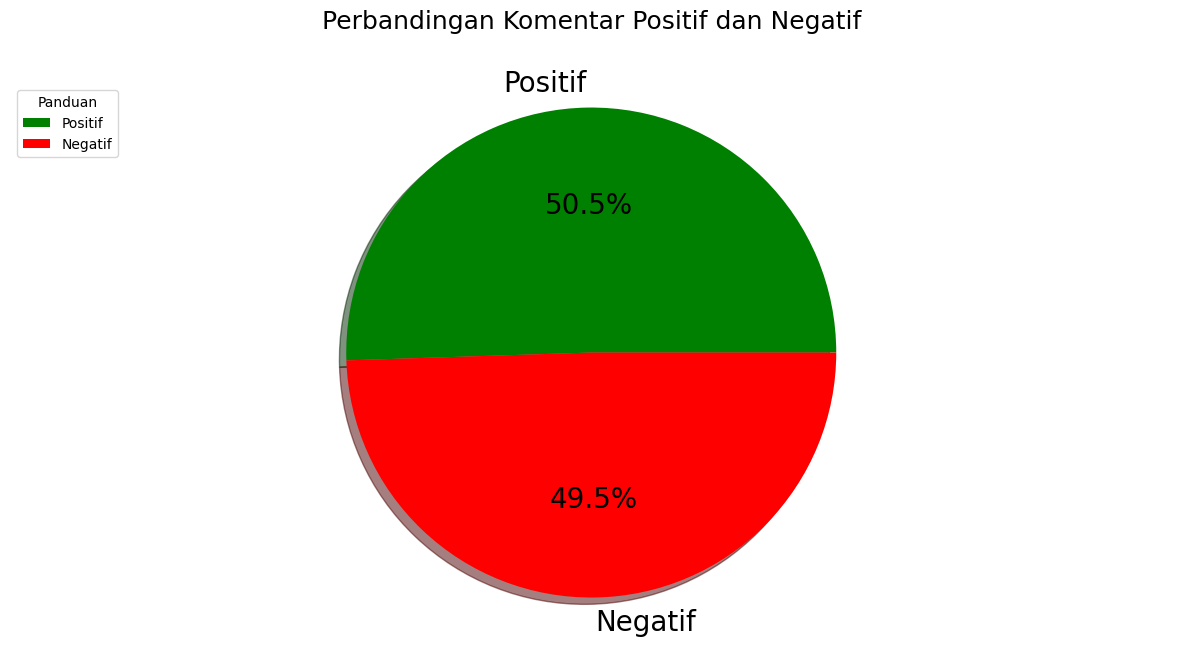

In [99]:
plt.figure(figsize=(15,7))
plt.pie(data_y, labels= labelss, shadow=True, autopct="%1.1f%%", colors=['g','r'], textprops={'fontsize': 20})
plt.title('Perbandingan Komentar Positif dan Negatif', y=1.05 , pad= 20, fontsize = 18)
plt.legend(title = 'Panduan', loc = 'upper left')


plt.axis('equal')
plt.show()

- Melakukan visualisasi terhadap data negatif dan positif

In [100]:
negatif = new_data[new_data['label'] == 0 ]
positif = new_data[new_data['label'] == 1 ]

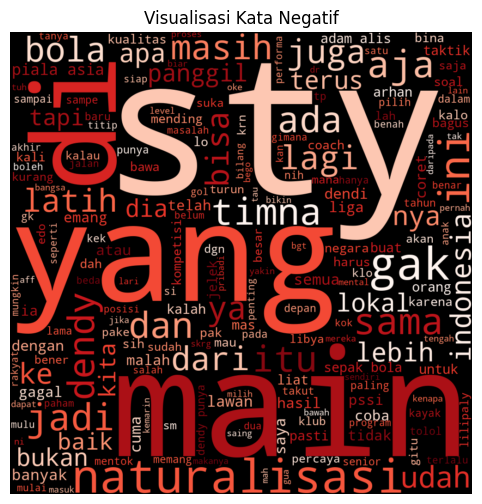

In [101]:
data_negatif = ' '.join(ngf for ngf in negatif['komentar'])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode = 'RGBA', background_color='black').generate(data_negatif)

plt.figure(figsize=(9,6)) # mengatur ukuran visualisasi plot

plt.imshow(wordcloud, interpolation='bilinear') # Menampilkan gambar word cloud yang telah dihasilkan.
# interpolation='bilinear' digunakan untuk menghaluskan gambar, membuatnya terlihat lebih baik saat ditampilkan.

plt.axis('off') # Menyembunyikan sumbu pada plot, sehingga hanya word cloud yang terlihat tanpa gangguan dari sumbu.
plt.title('Visualisasi Kata Negatif') 
plt.margins(x=0, y=0) # Mengatur margin di sekitar plot menjadi nol, sehingga word cloud mengisi ruang yang tersedia.

plt.show()

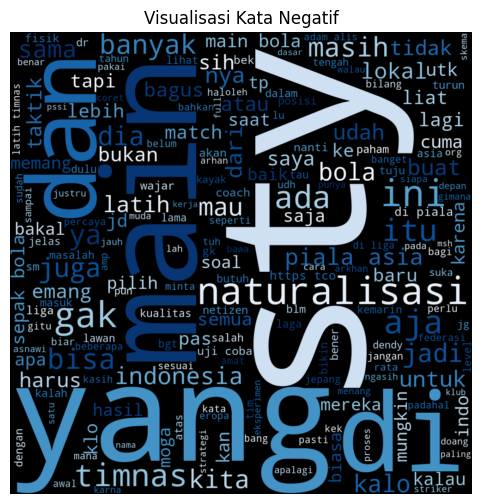

In [102]:
data_positif = ' '.join(ngf for ngf in positif['komentar'])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode = 'RGBA', background_color='black').generate(data_positif)

plt.figure(figsize=(9,6)) # mengatur ukuran visualisasi plot

plt.imshow(wordcloud, interpolation='bilinear') # Menampilkan gambar word cloud yang telah dihasilkan.
# interpolation='bilinear' digunakan untuk menghaluskan gambar, membuatnya terlihat lebih baik saat ditampilkan.

plt.axis('off') # Menyembunyikan sumbu pada plot, sehingga hanya word cloud yang terlihat tanpa gangguan dari sumbu.
plt.title('Visualisasi Kata Negatif') 
plt.margins(x=0, y=0) # Mengatur margin di sekitar plot menjadi nol, sehingga word cloud mengisi ruang yang tersedia.

plt.show()

---


----

# Data Preparation

In [103]:
new_data.sample(5)

,komentar,label
139,kayak sty kena teluhkwkwkwkkw,0
84,hallo om sty ada masalah apa sama borneo,0
130,banyak makan mielawak sty is out,0
257,1 sty jelasin klo match kmrn cuma mau cek kond...,1
149,formasi 4-2-2-2 yang coba coach sty kemaren em...,0


- Memisahkan data uji dan data latih

In [104]:
x = new_data['komentar']
y = new_data['label']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=42)

In [105]:
x_train.shape, y_train.shape

((313,), (313,))

- Mengubah teks menjadi numerik - CountVectorizer

In [106]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

x_train_vec = vectorizer.fit_transform(x_train)


In [107]:
x_test_vec = vectorizer.transform(x_test)

In [108]:
x_test_vec.shape, x_test.shape

((79, 1953), (79,))

In [109]:
x_train_vec.shape, y_train.shape

((313, 1953), (313,))

- Oversampling

In [110]:
smote = SMOTE(random_state=42)

x_train_res, y_train_res = smote.fit_resample(x_train_vec,y_train)

----

-----

# Modeling

In [111]:
model = MultinomialNB()
model.fit(x_train_vec,y_train) # melatih model

MultinomialNB()

In [112]:
y_pred = model.predict(x_test_vec)

- Evalusi Model 

In [113]:
akurasi = accuracy_score(y_test,y_pred)

klasifikasi = classification_report(y_test,y_pred, target_names=['negatif', 'positif'])

print(f'Akurasi model = {akurasi} \n')
print(f'Laporan klasifikasi : \n\n{klasifikasi}')

Akurasi model = 0.6582278481012658 

Laporan klasifikasi : 

              precision    recall  f1-score   support

     negatif       0.85      0.56      0.67        50
     positif       0.52      0.83      0.64        29

    accuracy                           0.66        79
   macro avg       0.69      0.69      0.66        79
weighted avg       0.73      0.66      0.66        79



In [114]:
data_test = input('\nMasukkan inputan = ')
data_test_vec = vectorizer.transform([data_test])
prediksi_sentimen = model.predict(data_test_vec)

if prediksi_sentimen[0] == 1 :
    sentimen = 'Positif '
elif prediksi_sentimen[0] == 0 :
    sentimen = 'Nagatif '

print('Inputan yang diberikan  \t= ', data_test)
print('Hasil analisis sentimen \t= ', sentimen)

Inputan yang diberikan  	=  sty ganteng banget
Hasil analisis sentimen 	=  Positif 


---

---

# Kesimpulan 

Dari apa yang telah dilakukan dengam melakukan analisis sentimen dengan menggunakan algoritma naive bayes dapat temukan bahwa akurasi model yang digunakan sebesar 0.6582278481012658


Bahwa akurasi model ini masih dapat dikatakan belum baik, karna mungkin berbagai faktor. Adapun hasil test yang telah digunakan dengan model ini dengan memasukan inputan kata yaitu : 


" sty ganteng banget "

Dengan kata tersebut model memproses dapat mendapakan hasil analisa sentimen dengan sentimen : 

" Positif "


Demikian analisa sentimen Timnas di Era Sty, semoga ini menjadi wawasan pembelajaran kedepan ... 
